In [2]:
#import dependencies 
import bs4 as bs
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use("ggplot")

In [3]:
# Create webscrape for s&p500 tickers
resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, "lxml")
table = soup.find('table', {'class': 'wikitable sortable'})

# Create list to hold tickers
# Loop through webscrape for each ticker and add to list
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [ticker.strip('\n') for ticker in tickers]

# Save list of tickers to pickle file
with open("sp500tickers.pickle", "wb") as f:
    pickle.dump(tickers, f)

print(tickers)

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'COST', 'COTY', 'CCI', 'CS

In [3]:
# Open pickle file of tickers
with open("sp500tickers.pickle", "rb") as f:
    tickers = pickle.load(f)

# Create spreadsheet for stock data    
if not os.path.exists('stock_dfs'):
    os.makedirs('stock_dfs')

#Set timeframe for individual stock data
start = dt.datetime(2015,1,1)
end = dt.datetime(2018,12,31)

# Loop through tickers and pull stock information for each ticker from yahoo
for ticker in tickers:
    print(ticker)
    try:
        # Create individual spreadsheet for each tickers data
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
            print('csv saved')

        else:
            print('Already had csv')
    except Exception:
        pass       

MMM
csv saved
ABT
csv saved
ABBV
csv saved
ABMD
csv saved
ACN
csv saved
ATVI
csv saved
ADBE
csv saved
AMD
csv saved
AAP
csv saved
AES
csv saved
AMG
csv saved
AFL
csv saved
A
csv saved
APD
csv saved
AKAM
csv saved
ALK
csv saved
ALB
csv saved
ARE
csv saved
ALXN
csv saved
ALGN
csv saved
ALLE
csv saved
AGN
csv saved
ADS
csv saved
LNT
csv saved
ALL
csv saved
GOOGL
csv saved
GOOG
csv saved
MO
csv saved
AMZN
csv saved
AEE
csv saved
AAL
csv saved
AEP
csv saved
AXP
csv saved
AIG
csv saved
AMT
csv saved
AWK
csv saved
AMP
csv saved
ABC
csv saved
AME
csv saved
AMGN
csv saved
APH
csv saved
APC
csv saved
ADI
csv saved
ANSS
csv saved
ANTM
csv saved
AON
csv saved
AOS
csv saved
APA
csv saved
AIV
csv saved
AAPL
csv saved
AMAT
csv saved
APTV
csv saved
ADM
csv saved
ARNC
csv saved
ANET
csv saved
AJG
csv saved
AIZ
csv saved
ATO
csv saved
T
csv saved
ADSK
csv saved
ADP
csv saved
AZO
csv saved
AVB
csv saved
AVY
csv saved
BHGE
csv saved
BLL
csv saved
BAC
csv saved
BK
csv saved
BAX
csv saved
BBT
csv saved
BDX


In [4]:
# Create DF to hold all stock data
main_df = pd.DataFrame()

# Loop through tickers list 
for count, ticker in enumerate(tickers):
    try:
        # Open individual spreadsheets, set data as index
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index("Date", inplace=True)

        # Rename the ADJ Close column and drop other columns
        df.rename(columns={"Adj Close": ticker}, inplace=True)
        df.drop(["Open","High", "Low", "Close", "Volume"], 1, inplace=True)

        # Add individual stock data to main_df
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how="outer")
        
        #print count every 25 
        if count % 25 == 0:
            print(count)
            
    except Exception:
        pass

# Save main_df to its own spreadsheet
main_df.to_csv("sp500_joined_closes.csv")  

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500


In [9]:
# Read main stock spreadsheet
df = pd.read_csv("sp500_joined_closes.csv")

# Find correlations between all stocks
df_corr = df.corr()

# Save correlation spreadsheet
df_corr.to_csv("sp500_correlation.csv") 
#print(df_corr.head())

# Set up plot for correlation matrix
corr = df_corr.values
data = pd.DataFrame(corr)

#Choose rows/columns for matrix
rowstart = 300
rowend = 315
columnstart = rowstart
columnend = rowend
select_data = pd.DataFrame(data.iloc[rowstart:rowend,columnstart:columnend])
df_corr.head(15)

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
MMM,1.000000,0.720911,0.877828,0.692075,0.874624,0.888041,0.807168,0.747551,-0.667806,0.398738,...,0.922858,0.790446,0.871125,0.308667,0.875327,0.921061,0.875679,0.569084,0.880239,0.814145
ABT,0.720911,1.000000,0.882564,0.901531,0.863370,0.763962,0.926249,0.789954,-0.271810,0.755848,...,0.830123,0.651626,0.696575,0.224069,0.853622,0.836768,0.899408,0.364290,0.801896,0.949249
ABBV,0.877828,0.882564,1.000000,0.848338,0.911220,0.864674,0.900937,0.704301,-0.530028,0.526286,...,0.907612,0.811094,0.735559,0.258457,0.841779,0.921181,0.897655,0.411578,0.892304,0.913428
ABMD,0.692075,0.901531,0.848338,1.000000,0.923493,0.854571,0.974376,0.822597,-0.220442,0.706685,...,0.778324,0.629455,0.729208,-0.001924,0.832699,0.880989,0.868049,0.349103,0.830497,0.955221
ACN,0.874624,0.863370,0.911220,0.923493,1.000000,0.937564,0.966212,0.855408,-0.400211,0.593903,...,0.883270,0.667951,0.871176,0.043372,0.927932,0.969021,0.932364,0.436070,0.910279,0.952539
ATVI,0.888041,0.763962,0.864674,0.854571,0.937564,1.000000,0.909291,0.817972,-0.550397,0.425970,...,0.873396,0.704383,0.854002,0.115607,0.868228,0.936756,0.871228,0.494311,0.898717,0.878710
ADBE,0.807168,0.926249,0.900937,0.974376,0.966212,0.909291,1.000000,0.866610,-0.348089,0.675625,...,0.866729,0.693275,0.822226,0.087018,0.912650,0.942542,0.931237,0.402520,0.895415,0.986339
AMD,0.747551,0.789954,0.704301,0.822597,0.855408,0.817972,0.866610,1.000000,-0.206199,0.696145,...,0.737013,0.494372,0.834408,0.074011,0.888892,0.845775,0.857059,0.546172,0.816711,0.856056
AAP,-0.667806,-0.271810,-0.530028,-0.220442,-0.400211,-0.550397,-0.348089,-0.206199,1.000000,0.120679,...,-0.651269,-0.672443,-0.498549,-0.440557,-0.408905,-0.505269,-0.440666,-0.287269,-0.480959,-0.342275
AES,0.398738,0.755848,0.526286,0.706685,0.593903,0.425970,0.675625,0.696145,0.120679,1.000000,...,0.525944,0.382204,0.523023,0.049504,0.623679,0.570799,0.707004,0.439440,0.516829,0.721795


<IPython.core.display.Javascript object>


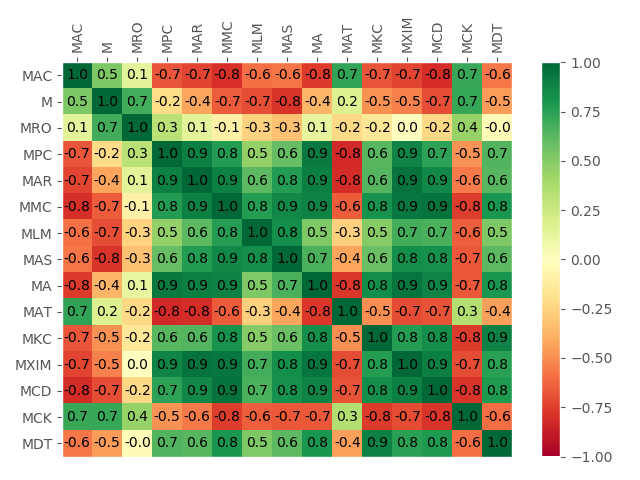

In [10]:
# Create plot of correlations
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

heatmap = ax.pcolor(select_data,cmap=plt.cm.RdYlGn)

for y in range(select_data.shape[0]):
    for x in range(select_data.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.01f' % select_data[y+rowstart][x+rowstart],
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='Black'
                 )
        
fig.colorbar(heatmap)
ax.set_xticks(np.arange(select_data.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(select_data.shape[1]) + 0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()


column_labels = df_corr.iloc[rowstart:rowend,columnstart:columnend].columns
row_labels = df_corr.iloc[rowstart:rowend,columnstart:columnend].index

ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)
plt.xticks(rotation=90)
heatmap.set_clim(-1,1)
plt.tight_layout()
plt.show
plt.savefig('Images/matrix.png')
    
  